# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure 2

## Panel a

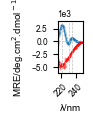

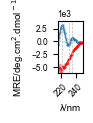

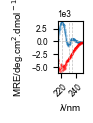

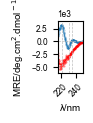

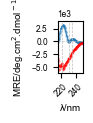

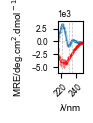

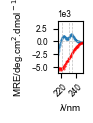

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import numpy as np

folded_spectra = ['FYN_WT_75uM_Smooth_230906-1', 'FYN_4or1_75uM_Smooth_230906-1', 'FYN_5or3_75uM_30C_Smooth_230906-1', 'FYN_1or4_75uM_30C_Smooth_230906-1', 'FYN_9or5_75uM_Smooth_230906-1', 'FYN_21or6_75uM_30C_Smooth_230906-1', 'FYN_19or7_60uM_30C_Smooth_230906-1']
unfolded_spectra = ['FYN_WT_75uM_95C_Draft_230906-1', 'FYN_4or1_75uM_95C_Draft_230906-1', 'FYN_5or3_75uM_95C_Draft_230906-1', 'FYN_1or4_75uM_90C_Draft_230906-1', 'FYN_9or5_75uM_Draft_230906-1', 'FYN_21or6_95C_75uM_Draft_230906-1', 'FYN_19or7_60uM_95C_Draft_230906-1']
names = ['WT FLFFIIV', 'Or1 FLFFVIV', 'Or3 MLFFIVL', 'Or4 MFFFVIL', 'Or5 MMFLIVF', 'Or6 LMFMLVF', 'Or7 LMVLLVL']
concentrations = [75, 75, 75, 75, 75, 75, 60]

blank_folded = pd.read_csv(path+'Fig2/CD/BLANK_FYN-ICI2_30C_Smooth_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_folded=blank_folded.sort_values('Wavelength')
blank_folded=blank_folded.set_index('Wavelength')
blank_folded['Wavelength']=blank_folded.index

blank_unfolded = pd.read_csv(path+'Fig2/CD/BLANK_FYN-ICI2_95C_Draft_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_unfolded=blank_unfolded.sort_values('Wavelength')
blank_unfolded=blank_unfolded.set_index('Wavelength')
blank_unfolded['Wavelength']=blank_unfolded.index

for folded_spectrum, unfolded_spectrum, name, concentration in zip(folded_spectra, unfolded_spectra, names, concentrations):
    
    data = pd.read_csv(path+'Fig2/CD/'+folded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    data=data.sort_values('Wavelength')
    data=data.set_index('Wavelength')
    data['Wavelength']=data.index
    
    conc_mM = concentration/1000
    protein_length = 62-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity-blank_folded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x=data['Wavelength']
    y=data['MRE']
    y_spl = UnivariateSpline(x,y, s=5000000)
    l = x.iloc[-1]
    x_range = np.linspace(x.iloc[0],x[l-1],1000)
    
    unfolded = pd.read_csv(path+'Fig2/CD/'+unfolded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    unfolded=unfolded.sort_values('Wavelength')
    unfolded=unfolded.set_index('Wavelength')
    unfolded['Wavelength']=unfolded.index
    
    for index, row in unfolded.iterrows():
        unfolded.at[index,'MRE']= (row.Ellipticity-blank_unfolded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x_u=unfolded['Wavelength']
    y_u=unfolded['MRE']
    y_spl_u = UnivariateSpline(x_u,y_u, s=100000000)
    
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    plt.plot(x_range, y_spl(x_range), '-', color='#1F77B4', linewidth=0.5)
    plt.plot(x_range, y_spl_u(x_range), '-', color='red', linewidth=0.5)
    data.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='#1F77B4', label='303K')
    unfolded.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='red', label='368K')
    plt.axvline(235,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axvline(230,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axvline(221,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axhline(0,ls='--',color='#BDBDBD',linewidth=0.5)
    #plt.title(name)
    
    plt.xlim(215,250)
    plt.ylim(-6100,4000)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(220,260,20),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-5000,5000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('λ/nm',fontname='Arial', fontsize=7)
    plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    
    ax.get_legend().remove()
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_CD_'+name+'.svg', dpi=300, transparent=True)


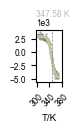

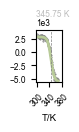

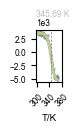

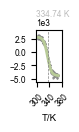

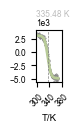

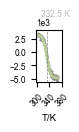

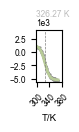

In [3]:
from scipy.optimize import curve_fit

Tramps = ['FYN_WT_Tramp_222nm-1-222nm', 'FYN_4or1_Tramp_222nm-1-222nm', 'FYN_5or3_Tramp_222nm-1-222nm', 'FYN_1or4_Tramp_222nm-1-222nm', 'FYN_9or5_Tramp_222nm-1-222nm', 'FYN_21or6_Tramp_222nm-1-222nm', 'FYN_19or7_Tramp_222nm-1-222nm']
names = ['WT FLFFIIV', 'Or1 FLFFVIV', 'Or3 MLFFIVL', 'Or4 MFFFVIL', 'Or5 MMFLIVF', 'Or6 LMFMLVF', 'Or7 LMVLLVL']
concentrations = [75, 75, 75, 75, 75, 75, 60]

blank_Tramp = pd.read_csv(path+'Fig2/CD/BLANK_FYN_ICI2_Tramp_222nm-1-222nm.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')


for Tramp, name, concentration in zip(Tramps, names, concentrations):
    
    data = pd.read_csv(path+'Fig2/CD/'+Tramp+'.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')
    
    conc_mM = concentration/1000
    protein_length = 62-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity)/((conc_mM*protein_length)*path_length_cm)
        data.at[index,'Temperature']=row.Temperature+273
    
    data=data.set_index('Temperature')
    data['Temperature']=data.index
        
    x=data['Temperature']
    l = x.iloc[-1]
    y=data['MRE']
    def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
        z = L / (1 + np.exp(-k*(x-x0))) + b
        return (z)
    
    p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess
    
    popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm')
    x_range = np.linspace(x.iloc[0],x[l],1000)
    y_sig = sigmoid(x_range, *popt)
    deriv = np.diff(y_sig)/np.diff(x_range)
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    
    data.plot(x='Temperature', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=1, color='gray')
    plt.plot(x_range, y_sig, '-', linewidth=2, color='#B8CB98')
    plt.axvline(x_range[np.argmin(deriv)],ls='--',color='gray',linewidth=0.5)
    plt.text(1.3, 1.4, str(round(x_range[np.argmin(deriv)], 2))+' K', ha='right', va='top', transform=ax.transAxes, color = '#BDBDBD', font='Arial', fontsize=6)
    
    l = x.iloc[-1]
    plt.xlim(299,373)
    plt.ylim(-5500,4100)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(300,400,40),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-5000,5000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('T/K',fontname='Arial', fontsize=7)
    #plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    plt.ylabel('',fontname='Arial', fontsize=7)
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_CD_Tramp_'+name+'.svg', dpi=300, transparent=True)


## Panel b

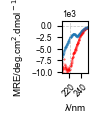

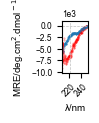

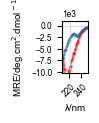

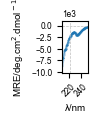

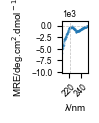

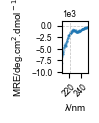

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import numpy as np

folded_spectra = ['ICI2_WT_50uM_30C_Smooth_230906-1', 'ICI2_23or1_25uM_30C_Smooth_230906-1', 'ICI2_20or3_50uM_30C_Smooth_230906-1', 'ICI2_5or5_50uM_30C_Smooth_230906-1', 'ICI2_4or6_37uM_30C_Smooth_230906-1', 'ICI2_18or7_25uM_30C_Smooth_230906-1']
unfolded_spectra = ['ICI2_WT_50uM_95C_Draft_230906-1', 'ICI2_23or1_25uM_95C_Draft_230906-1', 'ICI2_20or3_50uM_95C_Draft_230906-1', 'ICI2_5or5_75uM_95C_Draft_230906-1', 'ICI2_4or6_37uM_95C_Draft_230906-1', 'ICI2_18or7_25uM_95C_Draft_230906-1']
aggregated_unfolded_spectra = ['ICI2_5or5_75uM_95C_Draft_230906-1', 'ICI2_4or6_37uM_95C_Draft_230906-1', 'ICI2_18or7_25uM_95C_Draft_230906-1']
names = ['WT VIIVLVI', 'Or1 VIVVLVI', 'Or3 VIIIVVV', 'Or5 IIVIVVV', 'Or6 LMFIVVV', 'Or7 ILVIVIV']
concentrations = [50, 25, 50, 50, 37, 25]

blank_folded = pd.read_csv(path+'Fig2/CD/BLANK_FYN-ICI2_30C_Smooth_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_folded=blank_folded.sort_values('Wavelength')
blank_folded=blank_folded.set_index('Wavelength')
blank_folded['Wavelength']=blank_folded.index

blank_unfolded = pd.read_csv(path+'Fig2/CD/BLANK_FYN-ICI2_95C_Draft_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_unfolded=blank_unfolded.sort_values('Wavelength')
blank_unfolded=blank_unfolded.set_index('Wavelength')
blank_unfolded['Wavelength']=blank_unfolded.index

for folded_spectrum, unfolded_spectrum, name, concentration in zip(folded_spectra, unfolded_spectra, names, concentrations):
    
    data = pd.read_csv(path+'Fig2/CD/'+folded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    data=data.sort_values('Wavelength')
    data=data.set_index('Wavelength')
    data['Wavelength']=data.index
    data=data.loc[200:250]
    
    conc_mM = concentration/1000
    protein_length = 68-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity-blank_folded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x=data['Wavelength']
    y=data['MRE']
    y_spl = UnivariateSpline(x,y, s=5000000)
    l = x.iloc[-1]
    x_range = np.linspace(x.iloc[0],x[l-1],1000)
    
    unfolded = pd.read_csv(path+'Fig2/CD/'+unfolded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    unfolded=unfolded.sort_values('Wavelength')
    unfolded=unfolded.set_index('Wavelength')
    unfolded['Wavelength']=unfolded.index
    
    for index, row in unfolded.iterrows():
        unfolded.at[index,'MRE']= (row.Ellipticity-blank_unfolded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x_u=unfolded['Wavelength']
    y_u=unfolded['MRE']
    y_spl_u = UnivariateSpline(x_u,y_u, s=100000000)
    
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    if unfolded_spectrum not in aggregated_unfolded_spectra:
        plt.plot(x_range, y_spl_u(x_range), '-', color='red', linewidth=0.3)
        unfolded.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='red', label='368K')
    plt.plot(x_range, y_spl(x_range), '-', color='#1F77B4', linewidth=0.3)
    data.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='#1F77B4', label='303K')
    
    #plt.axvline(235,ls='--',color='#BDBDBD',linewidth=0.5)
    #plt.axvline(230,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axvline(222,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axhline(0,ls='--',color='#BDBDBD',linewidth=0.5)
    #plt.title(name)
    
    plt.xlim(210,250)
    plt.ylim(-10100,1000)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(220,260,20),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-10000,1000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('λ/nm',fontname='Arial', fontsize=7)
    plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    
    ax.get_legend().remove()
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('CI-2A_CD_'+name+'.svg', dpi=300, transparent=True)


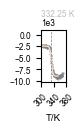

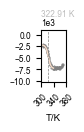

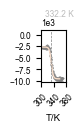

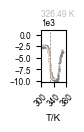

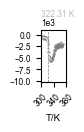

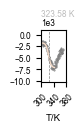

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Tramps = ['ICI2_WT_Tramp_222nm-1-222nm', 'ICI2_23or1_Tramp_222nm-1-222nm', 'ICI2_20or3_Tramp_222nm-1-222nm', 'ICI2_5or5_Tramp_222nm-1-222nm', 'ICI2_4or6_Tramp_222nm-1-222nm', 'ICI2_18or7_Tramp_222nm-1-222nm']
names = ['WT VIIVLVI', 'Or1 VIVVLVI', 'Or3 VIIIVVV', 'Or5 IIVIVVV', 'Or6 LMFIVVV', 'Or7 ILVIVIV']
concentrations = [50, 25, 50, 50, 37, 25]

blank_Tramp = pd.read_csv(path+'Fig2/CD/BLANK_FYN_ICI2_Tramp_222nm-1-222nm.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')


for Tramp, name, concentration in zip(Tramps, names, concentrations):
    
    data = pd.read_csv(path+'Fig2/CD/'+Tramp+'.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')
    
    conc_mM = concentration/1000
    protein_length = 68-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity)/((conc_mM*protein_length)*path_length_cm)
        data.at[index,'Temperature']=row.Temperature+273
    
    data=data.set_index('Temperature')
    data['Temperature']=data.index
        
    x=data[:data['MRE'].idxmin()]['Temperature']
    l = x.iloc[-1]
    y=data[:data['MRE'].idxmin()]['MRE']
    def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
        z = L / (1 + np.exp(-k*(x-x0))) + b
        return (z)
    
    p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess
    
    popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm')
    x_range = np.linspace(x.iloc[0],x[l],1000)
    y_sig = sigmoid(x_range, *popt)
    deriv = np.diff(y_sig)/np.diff(x_range)
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    
    data.plot(x='Temperature', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=1, color='gray')
    plt.plot(x_range, y_sig, '-', linewidth=1, color='#F6DCC9')
    plt.axvline(x_range[np.argmin(deriv)],ls='--',color='gray',linewidth=0.5)
    plt.text(1.3, 1.4, str(round(x_range[np.argmin(deriv)], 2))+' K', ha='right', va='top', transform=ax.transAxes, color = '#BDBDBD', font='Arial', fontsize=6)
    
    l = x.iloc[-1]
    plt.xlim(299,373)
    plt.ylim(-10100,1000)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(300,400,40),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-10000,1000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('T/K',fontname='Arial', fontsize=7)
    #plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    plt.ylabel('',fontname='Arial', fontsize=7)
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('CI-2A_CD_Tramp_'+name+'.svg', dpi=300, transparent=True)
